In [317]:
!pip install geopandas
!apt install libspatialindex-dev
!pip install rtree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libspatialindex-dev is already the newest version (1.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, LineString, Polygon
import geopandas as gpd
from geopandas import GeoDataFrame
from geopandas import GeoSeries
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [319]:
mexico = gpd.read_file('/content/mexican-states.shp')
mexico.head()

/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: /content/mexican-states.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


ISO3166-2 admin_leve        boundary is_in_coun is_in_co_1  \
0    MX-AGU          4  administrative     México         MX   
1    MX-COL          4  administrative     México         MX   
2    MX-TLA          4  administrative     México         MX   
3    MX-CMX          4  administrative     México         MX   
4    MX-MOR          4  administrative     México         MX   

               name      name_en           name_es   name_pl   name_ru  \
0    Aguascalientes         None              None      None      None   
1            Colima         None              None      None      None   
2          Tlaxcala     Tlaxcala          Tlaxcala  Tlaxcala  Тласкала   
3  Ciudad de México  Mexico City  Ciudad de México      None      None   
4           Morelos      Morelos           Morelos   Morelos   Морелос   

    name_uk  place   ref      type wikidata       wikipedia  \
0      None   None  None      None     None            None   
1      None   None  None      None     None            None   
2  Тласкала  state   TLA  boundary   Q82681     es:Tlaxcala   
3      None  state   DIF  boundary    Q1489  en:Mexico City   
4   Морелос  state   MOR  boundary   Q66117      es:Morelos   

                                            geometry  
0  MULTIPOLYGON (((-102.7453 21.72005, -102.74859...  
1  MULTIPOLYGON (((-103.48859 18.96489, -103.4884...  
2  POLYGON ((-98.5415 19.46082, -98.54158 19.4607...  
3  POLYGON ((-99.2787 19.1317, -99.28259 19.13821...  
4  POLYGON ((-98.90339 19.03848, -98.90061 19.038...

In [320]:
costco = pd.read_csv('/content/0.zdgkinsx62h0.lyo4ulpsaectiendaCostco (1).csv',encoding='UTF-8-sig',sep=',')
costco.columns = costco.columns.str.strip()
costco['fecha actual'] = pd.Timestamp.now()
costco['tel centro llantero'].fillna('00000000',inplace=True)
costco.head()

<ipython-input-320-f8b34c1a7400>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  costco['tel centro llantero'].fillna('00000000',inplace=True)


id          nombre                       direccion          ubicacion  \
0   1        "Puebla"     Blvd. del Niño Poblano 2904             Puebla   
1   2   "Villa Coapa"                      Puente 186              Coapa   
2   3    "Cuernavaca"        Av. Vicente Guerrero 205         Cuernavaca   
3   4    "Lindavista"      Av. Insurgentes Norte 1320  Gustavo A. Madero   
4   5       "Mixcoac"  Blvd. Adolfo López Mateos 1181     Alvaro Obregón   

     latitud   longitud tel centro llantero               fecha actual  
0  19.033499 -98.237794        222 2273 318 2025-04-27 00:34:15.049086  
1  19.284359 -99.138655            00000000 2025-04-27 00:34:15.049086  
2  18.934481 -99.233430        777 7101 523 2025-04-27 00:34:15.049086  
3  19.481697 -99.130063        55 5747 5691 2025-04-27 00:34:15.049086  
4  19.387237 -99.190718            00000000 2025-04-27 00:34:15.049086

In [321]:
costcoNulls = costco.isnull().drop_duplicates()
costcoNulls

id  nombre  direccion  ubicacion  latitud  longitud  \
0  False   False      False      False    False     False   

   tel centro llantero  fecha actual  
0                False         False

In [322]:
costcoGdp = gpd.GeoDataFrame(costco, geometry=gpd.points_from_xy(costco.longitud, costco.latitud))
costcoGdp.set_crs(epsg=4326, inplace=True)
costcoGdp.head()

id          nombre                       direccion          ubicacion  \
0   1        "Puebla"     Blvd. del Niño Poblano 2904             Puebla   
1   2   "Villa Coapa"                      Puente 186              Coapa   
2   3    "Cuernavaca"        Av. Vicente Guerrero 205         Cuernavaca   
3   4    "Lindavista"      Av. Insurgentes Norte 1320  Gustavo A. Madero   
4   5       "Mixcoac"  Blvd. Adolfo López Mateos 1181     Alvaro Obregón   

     latitud   longitud tel centro llantero               fecha actual  \
0  19.033499 -98.237794        222 2273 318 2025-04-27 00:34:15.049086   
1  19.284359 -99.138655            00000000 2025-04-27 00:34:15.049086   
2  18.934481 -99.233430        777 7101 523 2025-04-27 00:34:15.049086   
3  19.481697 -99.130063        55 5747 5691 2025-04-27 00:34:15.049086   
4  19.387237 -99.190718            00000000 2025-04-27 00:34:15.049086   

                     geometry  
0   POINT (-98.23779 19.0335)  
1  POINT (-99.13865 19.28436)  
2  POINT (-99.23343 18.93448)  
3   POINT (-99.13006 19.4817)  
4  POINT (-99.19072 19.38724)

In [323]:
#colums = ['nombre','geometry']
#costcoGdp = costcoGdp[colums]
costcoGdp.head()

id          nombre                       direccion          ubicacion  \
0   1        "Puebla"     Blvd. del Niño Poblano 2904             Puebla   
1   2   "Villa Coapa"                      Puente 186              Coapa   
2   3    "Cuernavaca"        Av. Vicente Guerrero 205         Cuernavaca   
3   4    "Lindavista"      Av. Insurgentes Norte 1320  Gustavo A. Madero   
4   5       "Mixcoac"  Blvd. Adolfo López Mateos 1181     Alvaro Obregón   

     latitud   longitud tel centro llantero               fecha actual  \
0  19.033499 -98.237794        222 2273 318 2025-04-27 00:34:15.049086   
1  19.284359 -99.138655            00000000 2025-04-27 00:34:15.049086   
2  18.934481 -99.233430        777 7101 523 2025-04-27 00:34:15.049086   
3  19.481697 -99.130063        55 5747 5691 2025-04-27 00:34:15.049086   
4  19.387237 -99.190718            00000000 2025-04-27 00:34:15.049086   

                     geometry  
0   POINT (-98.23779 19.0335)  
1  POINT (-99.13865 19.28436)  
2  POINT (-99.23343 18.93448)  
3   POINT (-99.13006 19.4817)  
4  POINT (-99.19072 19.38724)

In [324]:
## solo por confirmar

mexico = mexico.to_crs(epsg=3395)
costcoGdp = costcoGdp.to_crs(mexico.crs)


In [325]:
print(mexico.crs)
print(costcoGdp.crs)


EPSG:3395
EPSG:3395


In [326]:
mexicoStates = mexico['name'].unique()
mexicoStates

array(['Aguascalientes', 'Colima', 'Tlaxcala', 'Ciudad de México',
       'Morelos', 'México', 'Hidalgo', 'Puebla', 'Nuevo León',
       'Coahuila de Zaragoza', 'Chihuahua', 'Sonora',
       'Michoacán de Ocampo', 'Querétaro', 'Guanajuato', 'Jalisco',
       'Zacatecas', 'Durango', 'Tamaulipas',
       'Veracruz de Ignacio de la Llave', 'Guerrero', 'Sinaloa', 'Oaxaca',
       'Nayarit', 'Chiapas', 'Tabasco', 'Campeche', 'Baja California',
       'Baja California Sur', 'San Luis Potosí', 'Yucatán',
       'Quintana Roo'], dtype=object)

In [327]:
mexico['region'] = ['centro oeste','centro oeste','centro','centro','centro','centro','centro','centro','noreste','noreste','noreste','noroeste','centro oeste','centro oeste','centro oeste',
'centro oeste','centro oeste','noreste','noreste','sureste','sureste','noroeste','sureste','centro oeste','sureste','sureste','sureste','noroeste','noroeste','centro oeste','sureste','sureste']

mexico.head()

ISO3166-2 admin_leve        boundary is_in_coun is_in_co_1  \
0    MX-AGU          4  administrative     México         MX   
1    MX-COL          4  administrative     México         MX   
2    MX-TLA          4  administrative     México         MX   
3    MX-CMX          4  administrative     México         MX   
4    MX-MOR          4  administrative     México         MX   

               name      name_en           name_es   name_pl   name_ru  \
0    Aguascalientes         None              None      None      None   
1            Colima         None              None      None      None   
2          Tlaxcala     Tlaxcala          Tlaxcala  Tlaxcala  Тласкала   
3  Ciudad de México  Mexico City  Ciudad de México      None      None   
4           Morelos      Morelos           Morelos   Morelos   Морелос   

    name_uk  place   ref      type wikidata       wikipedia  \
0      None   None  None      None     None            None   
1      None   None  None      None     None            None   
2  Тласкала  state   TLA  boundary   Q82681     es:Tlaxcala   
3      None  state   DIF  boundary    Q1489  en:Mexico City   
4   Морелос  state   MOR  boundary   Q66117      es:Morelos   

                                            geometry        region  
0  MULTIPOLYGON (((-11437554.466 2462141.129, -11...  centro oeste  
1  MULTIPOLYGON (((-11520297.62 2136923.091, -115...  centro oeste  
2  POLYGON ((-10969589.491 2195037.196, -10969598...        centro  
3  POLYGON ((-11051653.796 2156450.689, -11052087...        centro  
4  POLYGON ((-11009874.99 2145535.754, -11009565....        centro

In [328]:
## para confirmar asignación de region

columns = ['name','region']

mexicoStates = mexico[columns].drop_duplicates().sort_values(by='region', ascending=True)
#mexicoStates

In [329]:
#columns2 = ['region','geometry']
#mexicoRegion = mexico[columns2]
mexicoRegion = mexico.dissolve(by='region')
mexicoRegion.head()

geometry ISO3166-2  \
region                                                                      
centro        POLYGON ((-11027971.888 2063088.821, -11027989...    MX-TLA   
centro oeste  MULTIPOLYGON (((-11826597.129 2416105.997, -11...    MX-AGU   
noreste       POLYGON ((-11604992.795 2585104.172, -11605035...    MX-NLE   
noroeste      MULTIPOLYGON (((-12723016.431 3117762.641, -12...    MX-SON   
sureste       MULTIPOLYGON (((-10693318.704 1767628.612, -10...    MX-VER   

             admin_leve        boundary is_in_coun is_in_co_1  \
region                                                          
centro                4  administrative     México         MX   
centro oeste          4  administrative     México         MX   
noreste               4  administrative     México         MX   
noroeste              4  administrative     México         MX   
sureste               4  administrative     México         MX   

                                         name     name_en  \
region                                                      
centro                               Tlaxcala    Tlaxcala   
centro oeste                   Aguascalientes   Michoacán   
noreste                            Nuevo León  Nuevo León   
noroeste                               Sonora      Sonora   
sureste       Veracruz de Ignacio de la Llave    Veracruz   

                                      name_es     name_pl     name_ru  \
region                                                                  
centro                               Tlaxcala    Tlaxcala    Тласкала   
centro oeste              Michoacán de Ocampo   Michoacán    Мичоакан   
noreste                            Nuevo León  Nuevo León  Нуэво-Леон   
noroeste                               Sonora      Sonora      Сонора   
sureste       Veracruz de Ignacio de la Llave    Veracruz    Веракрус   

                 name_uk  place  ref      type wikidata  \
region                                                    
centro          Тласкала  state  TLA  boundary   Q82681   
centro oeste    Мічоакан  state  MIC  boundary   Q79861   
noreste       Нуево-Леон  state  NLE  boundary   Q15282   
noroeste          Сонора  state  SON  boundary   Q46422   
sureste         Веракрус  state  VER  boundary   Q60130   

                                       wikipedia  
region                                            
centro                               es:Tlaxcala  
centro oeste                        es:Michoacán  
noreste                            es:Nuevo León  
noroeste                               es:Sonora  
sureste       es:Veracruz de Ignacio de la Llave

In [330]:
print(mexicoRegion.crs)
print(costcoGdp.crs)

EPSG:3395
EPSG:3395


In [331]:
#costcoGdp = costcoGdp[costcoGdp.isnull().any(axis=1)]
#mexicoRegion = mexicoRegion[mexicoRegion.isnull().any(axis=1)]
#costcoGdp

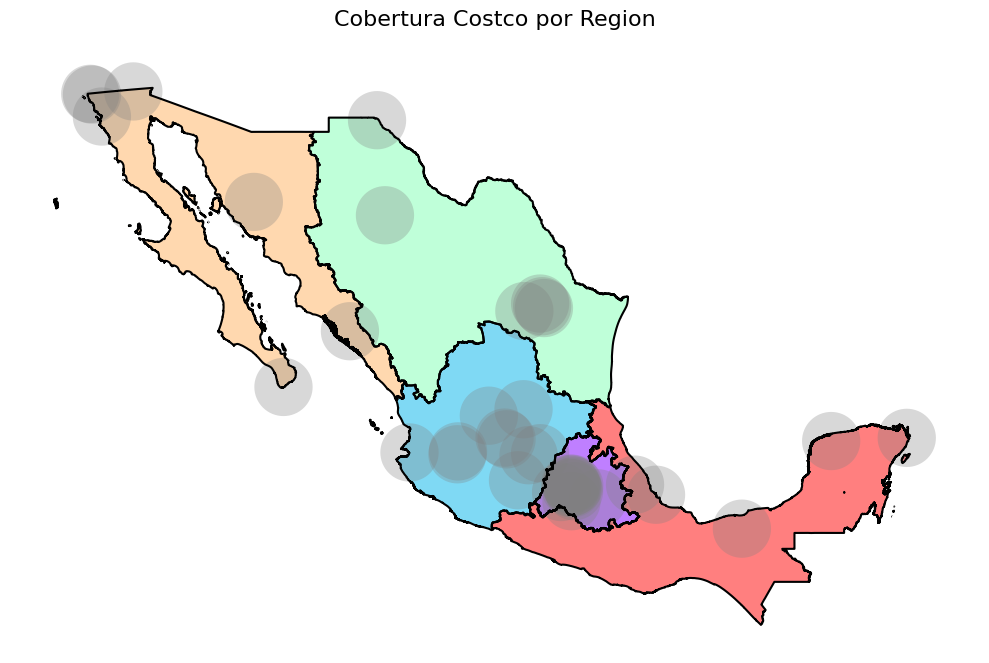

In [332]:
# Plot base map
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Cobertura Costco por Region", fontsize=16)
ax.set_axis_off()


mexicoRegion.plot(ax=ax, alpha=0.5, cmap="rainbow",zorder=1)

costcoGdpbuffer = gpd.GeoDataFrame(geometry=costcoGdp.buffer(120000), crs=costcoGdp.crs)
costcoGdpbuffer.plot(ax=ax, color='gray', alpha=0.3,zorder=2)
mexicoRegion.boundary.plot(ax=ax,color='black',zorder=3)



interseccionRegiones = gpd.overlay(mexicoRegion, costcoGdpbuffer, how='intersection',keep_geom_type=False)
interseccionRegiones = interseccionRegiones[interseccionRegiones.geometry.type.isin(['Polygon', 'MultiPolygon'])]


plt.tight_layout()
plt.show()

In [333]:
## Regiones donde es conveniente abrir sucursales de acuerdo al radio de entrega por parte de Costco : Centro y CentroOeste
## Regiones donde no es conveniente abrir sucursales de acuerdo al radio de entrega por parte de Costco : Noroeste, Noreste y Sureste

##Sin embargo se puede realizar el analisis por estado y veremos que hay oportunidad en el norte de Baja California Norte y centro Nuevo Leon, aun que sean estados de regiones no convenientes


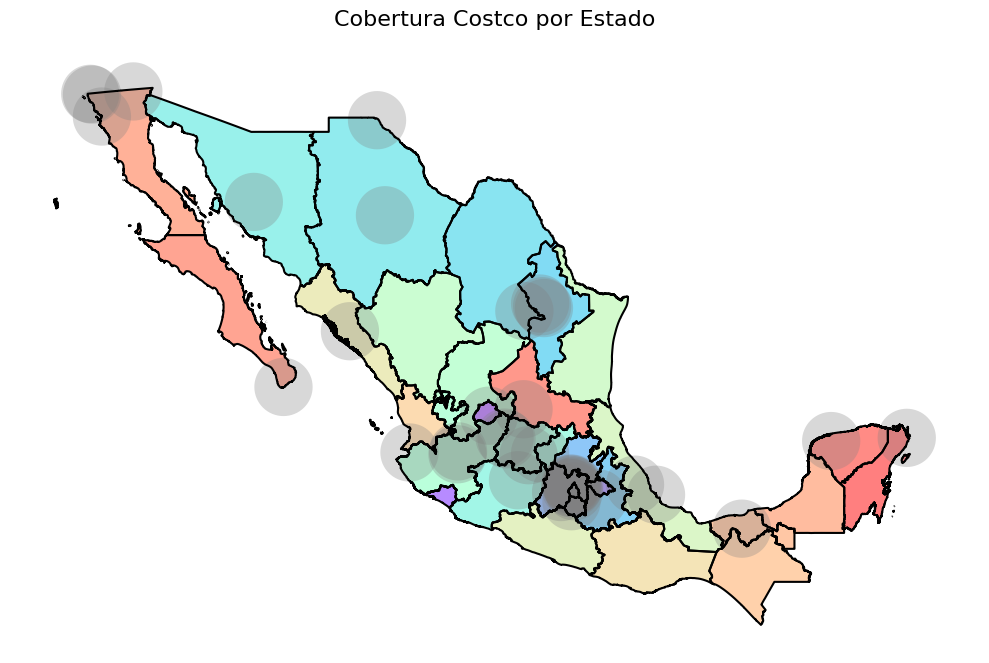

In [334]:
# Plot base map
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Cobertura Costco por Estado", fontsize=16)
ax.set_axis_off()


mexico.plot(ax=ax, alpha=0.5, cmap="rainbow",zorder=1)

costcoGdpbuffer = gpd.GeoDataFrame(geometry=costcoGdp.buffer(120000), crs=costcoGdp.crs)
costcoGdpbuffer.plot(ax=ax, color='gray', alpha=0.3,zorder=2)
mexico.boundary.plot(ax=ax,color='black',zorder=3)



interseccionRegiones = gpd.overlay(mexico, costcoGdpbuffer, how='intersection',keep_geom_type=False)
interseccionRegiones = interseccionRegiones[interseccionRegiones.geometry.type.isin(['Polygon', 'MultiPolygon'])]


plt.tight_layout()
plt.show()